# Tables generation (models and data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sfma import Data, SFMAModel, Variable, SplineVariable, SplineGetter, SplinePriorGetter, UniformPrior
from pystoned import CNLS,StoNED
from pystoned.plot import plot2d
from pystoned.constant import CET_ADDI, FUN_PROD, RTS_VRS,RED_MOM,RED_QLE,RED_KDE
from pystoned.constant import CET_MULT, FUN_COST, RTS_VRS, RED_MOM,RED_QLE,RED_KDE
from pystoned import CNLS, StoNED
from scipy import optimize
from pystoned.plot import plot2d
from pystoned.constant import CET_ADDI, FUN_PROD, RTS_VRS,RED_MOM,RED_QLE,RED_KDE
from func_benchmark import *
import warnings
warnings.filterwarnings('ignore')

In [54]:
def model_tab_gen(df):
    df_st = data_.stoned_(df = df)
    df_sfa = data_.sfma_(df)
    df_results = df_st
    df_results['data_id'] = df['data_id'] 
    df_sfa['data_id'] = df['data_id'] 
    df_results.columns = ['x','y','cnls','qle','mom','data_id']
    df_results = df_results.merge(df_sfa, on=['data_id','x'])
    df_results.columns = ['x','y','cnls','qle','mom','data_id','sfma']
    df_melted = pd.melt(df_results, id_vars=["data_id","x",'y'], value_vars=['cnls','qle','mom','sfma'])
#     df_melted['data_type'] = 'data_type_'
    df_melted.columns = ['data_id','x','y','model','value']
    df_melted.head()
    return df_melted

## Homoskedastic

In [55]:
data_ = comp_sfa() 
df_homosk = data_.generate_(type = "homosk",u_scale=1, e_scale = 0.2, n_sample = 200)
df_homosk['data_id'] = df_homosk.index
df_homosk['data_type'] = 'homosk'

In [56]:
df_model_homosk = model_tab_gen(df_homosk)

Estimating the additive model remotely with mosek solver.


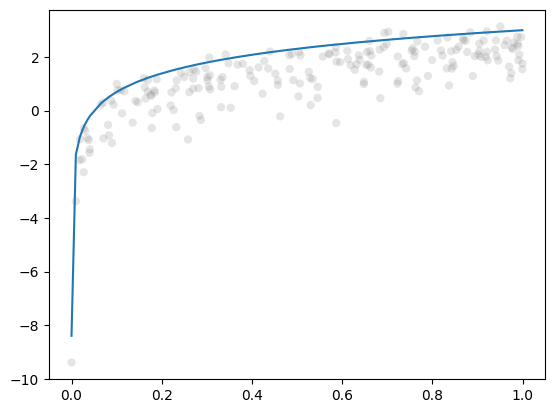

In [57]:
plt.scatter(df_homosk['x'], df_homosk['y'], color="gray", edgecolor="none", alpha=0.2)
plt.plot(df_homosk['x'], df_homosk['y_true'])

In [66]:
df_model_homosk['data_type'] = 'homosk'
df_model_homosk.head()

,data_id,x,y,model,value,data_type
0,0,0.000011,-9.387522,cnls,-9.387062,homosk
1,1,0.009649,-3.371368,cnls,-3.380459,homosk
2,2,0.017891,-1.845720,cnls,-1.767532,homosk
3,3,0.019021,-1.059730,cnls,-1.547760,homosk
4,4,0.023554,-1.814906,cnls,-1.449985,homosk


## Heteroskedastic

In [60]:
data_ = comp_sfa() 
df_heterosk = data_.generate_(type = "heterosk",u_scale=1, e_scale = 0.2, n_sample = 200)
df_heterosk['data_id'] = df_heterosk.index
df_heterosk['data_type'] = 'heterosk'

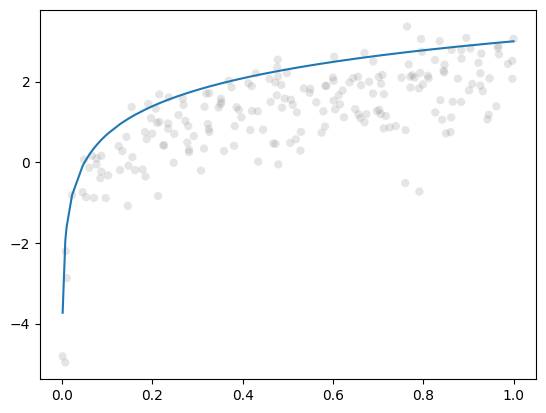

In [61]:
df = df_heterosk
plt.scatter(df_heterosk['x'], df_heterosk['y'], color="gray", edgecolor="none", alpha=0.2)
plt.plot(df_heterosk['x'], df_heterosk['y_true'])

In [62]:
df_model_heterosk = model_tab_gen(df_heterosk)

Estimating the additive model remotely with mosek solver.


In [67]:
df_model_heterosk['data_type'] = 'heterosk'
df_model_heterosk.head()


,data_id,x,y,model,value,data_type
0,0,0.001195,-4.810449,cnls,-4.970139,heterosk
1,1,0.007094,-4.962360,cnls,-3.588296,heterosk
2,2,0.007891,-2.202695,cnls,-3.401686,heterosk
3,3,0.010111,-2.873055,cnls,-2.886411,heterosk
4,4,0.022102,-0.816519,cnls,-0.840214,heterosk


# Create tabular data

In [68]:
[df_model_homosk.head(),df_model_heterosk.head()]

[   data_id         x         y model     value data_type
 0        0  0.000011 -9.387522  cnls -9.387062    homosk
 1        1  0.009649 -3.371368  cnls -3.380459    homosk
 2        2  0.017891 -1.845720  cnls -1.767532    homosk
 3        3  0.019021 -1.059730  cnls -1.547760    homosk
 4        4  0.023554 -1.814906  cnls -1.449985    homosk,
    data_id         x         y model     value data_type
 0        0  0.001195 -4.810449  cnls -4.970139  heterosk
 1        1  0.007094 -4.962360  cnls -3.588296  heterosk
 2        2  0.007891 -2.202695  cnls -3.401686  heterosk
 3        3  0.010111 -2.873055  cnls -2.886411  heterosk
 4        4  0.022102 -0.816519  cnls -0.840214  heterosk]

In [72]:
df_data = pd.concat([df_homosk,df_heterosk], axis = 0)

In [73]:
df_data['data_type'].value_counts()

homosk      200
heterosk    200
Name: data_type, dtype: int64

In [74]:
df_model = pd.concat([df_model_homosk,df_model_heterosk], axis = 0)

In [75]:
df_model['data_type'].value_counts()

homosk      800
heterosk    800
Name: data_type, dtype: int64

In [76]:
df_data.to_csv('data_var.csv',index=False)
df_model.to_csv('data_mod.csv',index=False)